解析解

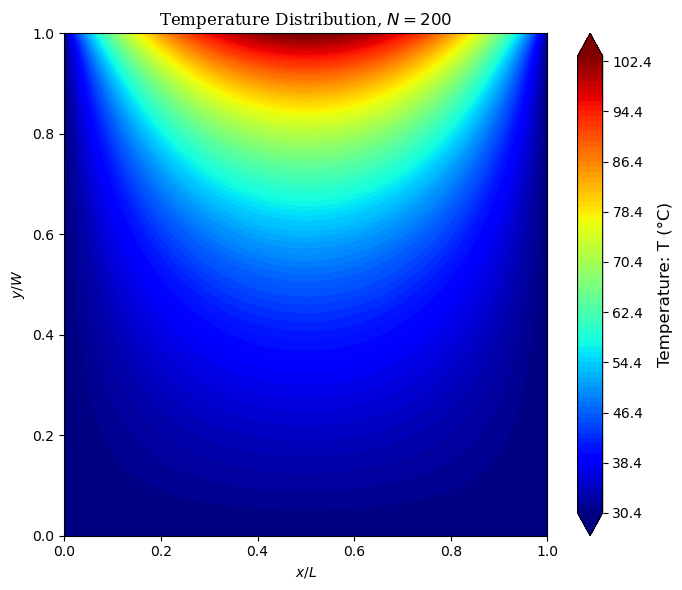

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

# 参数定义
L = 1.0  # 板长
W = 1.0  # 板宽
M = 200  # x方向网格数
N = 200  # y方向网格数
q = 2000  # 热流密度
k = 10  # 导热系数
T_base = 30.0  # 基础温度
pi = math.pi

# 创建网格
x = np.linspace(0, L, M)
y = np.linspace(0, W, N)
X, Y = np.meshgrid(x, y)

# 展开项数
Nterm = 200

# 初始化温度矩阵
T = np.zeros((M, N))

# 解析解计算
for n in range(1, Nterm + 1):
    coefficient = (2 * ((-1) ** (n + 1) + 1)) / (n ** 2 * pi ** 2 * math.cosh(n * pi * W / L))
    term = (
        coefficient
        * np.sin(n * pi * X / L)
        * np.sinh(n * pi * Y / L)
    )
    T += (q * L / k) * term

# 加上基准温度
T += T_base

# 绘制温度分布图
plt.figure(figsize=(7, 6))
plt.title("Temperature Distribution, $N = 200$", fontname="serif")
contour = plt.contourf(X, Y, T, levels=100, cmap=cm.jet, extend="both")
plt.xlabel("$x/L$", fontname="serif")
plt.ylabel("$y/W$", fontname="serif")
cbar = plt.colorbar(contour)
cbar.set_label("Temperature: T (°C)", fontsize=12)
plt.tight_layout()
plt.savefig("plate.pdf")
plt.show()

数值解

迭代次数: 3774
最大误差: 9.981350487464624e-06


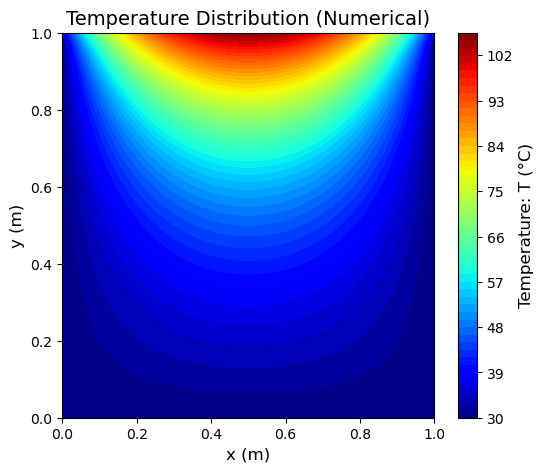

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 参数定义
L = 1.0   # 板长 (m)
W = 1.0   # 板宽 (m)
k = 10.0  # 导热系数 (W/m·K)
q_s = -2000.0  # 热流密度 (W/m^2)
T1 = 30.0     # 边界温度 (°C)

# 网格划分
Nx = 51
Ny = 51
dx = L/(Nx-1)
dy = W/(Ny-1)

# 初始化温度场
T = np.zeros((Nx, Ny)) + T1

# 设置Dirichlet边界条件（左、右、下）
T[0, :] = T1    # 左边界
T[-1, :] = T1   # 右边界
T[:, 0] = T1    # 下边界

# 收敛标准
tol = 1e-5
max_iter = 100000
error = 1.0
iter_count = 0


while error > tol and iter_count < max_iter:
    error = 0.0
    T_old = T.copy()
    
    # 应用顶部Neumann边界条件
    for i in range(Nx):
        T[i, Ny-1] = T[i, Ny-2] + 200.0 * dy  

    # 内点更新（Gauss-Seidel迭代）
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            if j < Ny-1:
                T[i,j] = 0.25*(T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1])

    # 计算误差
    error = np.max(np.abs(T - T_old))
    iter_count += 1

print("迭代次数:", iter_count)
print("最大误差:", error)

# 绘图
x = np.linspace(0, L, Nx)
y = np.linspace(0, W, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')

plt.figure(figsize=(6,5))
contour = plt.contourf(X, Y, T, 50, cmap='jet')
cbar = plt.colorbar(contour)
cbar.set_label('Temperature: T (°C)', fontsize=12)
plt.title('Temperature Distribution (Numerical)', fontsize=14)
plt.xlabel('x (m)', fontsize=12)
plt.ylabel('y (m)', fontsize=12)
plt.show()

PINNS

TensorFlow version: 2.18.0
Eager Execution: True


  0%|          | 2/5000 [00:00<14:49,  5.62it/s]

Epoch: 0, Loss PDE: 0.00014953491336200386, Loss BC: 0.9625695943832397


  2%|▏         | 102/5000 [00:16<13:40,  5.97it/s]

Epoch: 100, Loss PDE: 0.03798668086528778, Loss BC: 0.09431808441877365


  4%|▍         | 202/5000 [00:32<12:30,  6.39it/s]

Epoch: 200, Loss PDE: 0.01870717667043209, Loss BC: 0.0315907821059227


  6%|▌         | 302/5000 [00:48<12:06,  6.47it/s]

Epoch: 300, Loss PDE: 0.004905730951577425, Loss BC: 0.026417948305606842


  8%|▊         | 402/5000 [01:05<12:20,  6.21it/s]

Epoch: 400, Loss PDE: 0.0024179844185709953, Loss BC: 0.028925104066729546


 10%|█         | 502/5000 [01:21<11:08,  6.73it/s]

Epoch: 500, Loss PDE: 0.0026124983560293913, Loss BC: 0.017534123733639717


 12%|█▏        | 602/5000 [01:37<11:17,  6.49it/s]

Epoch: 600, Loss PDE: 0.0024918890558183193, Loss BC: 0.015075058676302433


 14%|█▍        | 702/5000 [01:54<12:24,  5.77it/s]

Epoch: 700, Loss PDE: 0.002589853247627616, Loss BC: 0.01477122399955988


 16%|█▌        | 802/5000 [02:10<10:28,  6.68it/s]

Epoch: 800, Loss PDE: 0.0024980278685688972, Loss BC: 0.013452167622745037


 18%|█▊        | 902/5000 [02:26<10:16,  6.65it/s]

Epoch: 900, Loss PDE: 0.002978014526888728, Loss BC: 0.017682529985904694


 20%|██        | 1002/5000 [02:42<10:12,  6.52it/s]

Epoch: 1000, Loss PDE: 0.002321186475455761, Loss BC: 0.012087560258805752


 22%|██▏       | 1102/5000 [02:59<10:47,  6.02it/s]

Epoch: 1100, Loss PDE: 0.0019968990236520767, Loss BC: 0.011213011108338833


 24%|██▍       | 1202/5000 [03:15<09:02,  7.00it/s]

Epoch: 1200, Loss PDE: 0.0016216289950534701, Loss BC: 0.010605813935399055


 26%|██▌       | 1302/5000 [03:32<09:56,  6.20it/s]

Epoch: 1300, Loss PDE: 0.0015794184291735291, Loss BC: 0.009579618461430073


 28%|██▊       | 1402/5000 [03:48<10:01,  5.98it/s]

Epoch: 1400, Loss PDE: 0.0015889918431639671, Loss BC: 0.00933867134153843


 30%|███       | 1502/5000 [04:04<09:41,  6.02it/s]

Epoch: 1500, Loss PDE: 0.001399636035785079, Loss BC: 0.008471520617604256


 32%|███▏      | 1602/5000 [04:20<08:38,  6.55it/s]

Epoch: 1600, Loss PDE: 0.0014838435454294086, Loss BC: 0.0128706069663167


 34%|███▍      | 1702/5000 [04:36<08:45,  6.27it/s]

Epoch: 1700, Loss PDE: 0.0010310285724699497, Loss BC: 0.007685970515012741


 36%|███▌      | 1802/5000 [04:52<08:37,  6.18it/s]

Epoch: 1800, Loss PDE: 0.0010270908242091537, Loss BC: 0.007555685937404633


 38%|███▊      | 1902/5000 [05:08<08:05,  6.38it/s]

Epoch: 1900, Loss PDE: 0.0009541062754578888, Loss BC: 0.007350734435021877


 40%|████      | 2002/5000 [05:25<08:00,  6.24it/s]

Epoch: 2000, Loss PDE: 0.0008705456275492907, Loss BC: 0.00719763757660985


 42%|████▏     | 2102/5000 [05:41<07:56,  6.08it/s]

Epoch: 2100, Loss PDE: 0.0008587188203819096, Loss BC: 0.0071324314922094345


 44%|████▍     | 2202/5000 [05:57<07:31,  6.20it/s]

Epoch: 2200, Loss PDE: 0.0007455243030562997, Loss BC: 0.0069706072099506855


 46%|████▌     | 2302/5000 [06:13<07:39,  5.87it/s]

Epoch: 2300, Loss PDE: 0.000628631329163909, Loss BC: 0.006815546192228794


 48%|████▊     | 2402/5000 [06:30<07:13,  5.99it/s]

Epoch: 2400, Loss PDE: 0.0005636370624415576, Loss BC: 0.006734245456755161


 50%|█████     | 2502/5000 [06:46<06:41,  6.22it/s]

Epoch: 2500, Loss PDE: 0.0004382374754641205, Loss BC: 0.006429391913115978


 52%|█████▏    | 2602/5000 [07:02<06:46,  5.90it/s]

Epoch: 2600, Loss PDE: 0.0003617337206378579, Loss BC: 0.006145907565951347


 54%|█████▍    | 2702/5000 [07:19<06:31,  5.87it/s]

Epoch: 2700, Loss PDE: 0.00037654698826372623, Loss BC: 0.005944035481661558


 56%|█████▌    | 2802/5000 [07:35<06:01,  6.07it/s]

Epoch: 2800, Loss PDE: 0.0003643410454969853, Loss BC: 0.005672890227288008


 58%|█████▊    | 2902/5000 [07:51<05:24,  6.46it/s]

Epoch: 2900, Loss PDE: 0.00036980872391723096, Loss BC: 0.005462166387587786


 60%|██████    | 3002/5000 [08:08<05:19,  6.25it/s]

Epoch: 3000, Loss PDE: 0.0009173590806312859, Loss BC: 0.008619964122772217


 62%|██████▏   | 3102/5000 [08:24<04:52,  6.48it/s]

Epoch: 3100, Loss PDE: 0.0003757934318855405, Loss BC: 0.0051290616393089294


 64%|██████▍   | 3202/5000 [08:40<05:08,  5.82it/s]

Epoch: 3200, Loss PDE: 0.00038236496038734913, Loss BC: 0.004991184454411268


 66%|██████▌   | 3302/5000 [08:57<04:44,  5.96it/s]

Epoch: 3300, Loss PDE: 0.0003823252918664366, Loss BC: 0.004798638168722391


 68%|██████▊   | 3402/5000 [09:13<04:29,  5.94it/s]

Epoch: 3400, Loss PDE: 0.00036763923708349466, Loss BC: 0.004758534021675587


 70%|███████   | 3502/5000 [09:29<03:49,  6.52it/s]

Epoch: 3500, Loss PDE: 0.0003855298273265362, Loss BC: 0.004524477291852236


 72%|███████▏  | 3602/5000 [09:45<04:00,  5.81it/s]

Epoch: 3600, Loss PDE: 0.00039210516843013465, Loss BC: 0.00439809076488018


 74%|███████▍  | 3702/5000 [10:01<03:07,  6.91it/s]

Epoch: 3700, Loss PDE: 0.0003985260264016688, Loss BC: 0.004216108936816454


 76%|███████▌  | 3802/5000 [10:17<03:22,  5.91it/s]

Epoch: 3800, Loss PDE: 0.0035394898150116205, Loss BC: 0.008160190656781197


 78%|███████▊  | 3902/5000 [10:34<03:07,  5.87it/s]

Epoch: 3900, Loss PDE: 0.00042234393185935915, Loss BC: 0.003977417945861816


 80%|████████  | 4002/5000 [10:50<02:39,  6.27it/s]

Epoch: 4000, Loss PDE: 0.0005689936806447804, Loss BC: 0.004326310008764267


 82%|████████▏ | 4102/5000 [11:07<02:32,  5.88it/s]

Epoch: 4100, Loss PDE: 0.0004464180092327297, Loss BC: 0.003762904554605484


 84%|████████▍ | 4202/5000 [11:24<02:13,  5.97it/s]

Epoch: 4200, Loss PDE: 0.0004555286723189056, Loss BC: 0.0036103976890444756


 86%|████████▌ | 4302/5000 [11:40<02:01,  5.76it/s]

Epoch: 4300, Loss PDE: 0.00048372388118878007, Loss BC: 0.0037953900173306465


 88%|████████▊ | 4402/5000 [11:57<01:44,  5.75it/s]

Epoch: 4400, Loss PDE: 0.0004445009690243751, Loss BC: 0.0034738979302346706


 90%|█████████ | 4502/5000 [12:14<01:24,  5.91it/s]

Epoch: 4500, Loss PDE: 0.002150106942281127, Loss BC: 0.004872601479291916


 92%|█████████▏| 4602/5000 [12:30<01:04,  6.14it/s]

Epoch: 4600, Loss PDE: 0.0004225709126330912, Loss BC: 0.003220639657229185


 94%|█████████▍| 4702/5000 [12:47<00:52,  5.70it/s]

Epoch: 4700, Loss PDE: 0.0055136773735284805, Loss BC: 0.014970613643527031


 96%|█████████▌| 4802/5000 [13:03<00:33,  5.85it/s]

Epoch: 4800, Loss PDE: 0.00039617257425561547, Loss BC: 0.003044096753001213


 98%|█████████▊| 4902/5000 [13:19<00:15,  6.17it/s]

Epoch: 4900, Loss PDE: 0.00038223841693252325, Loss BC: 0.002815798157826066


100%|██████████| 5000/5000 [13:36<00:00,  6.13it/s]


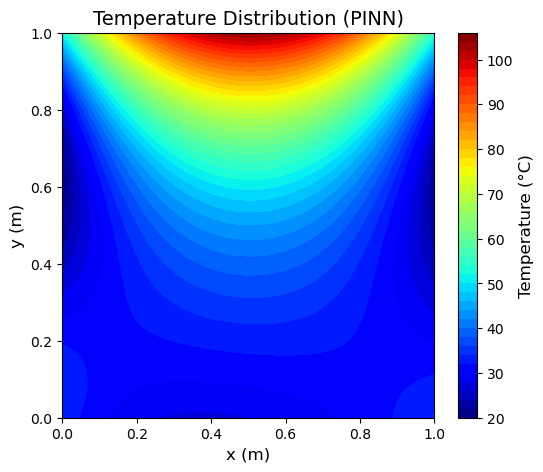

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

# 检查Eager模式
print("TensorFlow version:", tf.__version__)
print("Eager Execution:", tf.executing_eagerly()) # 在TF 2.x下通常应为 True

L = 1.0
W = 1.0
k_original = 10.0
q_s_original = 2000.0
T1_original = 30.0

k = 1.0
q_s = 1.0 / L
T1 = 0.0

layers = [2, 128, 128, 128, 1]

N_int = 2000
x_int = np.random.rand(N_int,1)*L
y_int = np.random.rand(N_int,1)*W
X_int = np.hstack((x_int,y_int))

N_bc = 200
y_left = np.random.rand(N_bc,1)*W
x_left = np.zeros_like(y_left)
X_left = np.hstack((x_left,y_left))

y_right = np.random.rand(N_bc,1)*W
x_right = L*np.ones_like(y_right)
X_right = np.hstack((x_right,y_right))

x_bottom = np.random.rand(N_bc,1)*L
y_bottom = np.zeros_like(x_bottom)
X_bottom = np.hstack((x_bottom,y_bottom))

x_top = np.random.rand(N_bc,1)*L
y_top = W*np.ones_like(x_top)
X_top = np.hstack((x_top,y_top))

X_int_tf = tf.convert_to_tensor(X_int, dtype=tf.float32)
X_left_tf = tf.convert_to_tensor(X_left, dtype=tf.float32)
X_right_tf = tf.convert_to_tensor(X_right, dtype=tf.float32)
X_bottom_tf = tf.convert_to_tensor(X_bottom, dtype=tf.float32)
X_top_tf = tf.convert_to_tensor(X_top, dtype=tf.float32)

def neural_net(layers):
    model = tf.keras.Sequential()
    for i in range(len(layers)-1):
        if i < len(layers)-2:
            model.add(tf.keras.layers.Dense(layers[i+1], activation='tanh', 
                                            kernel_initializer='glorot_normal'))
        else:
            model.add(tf.keras.layers.Dense(layers[i+1], activation=None, 
                                            kernel_initializer='glorot_normal'))
    return model

model = neural_net(layers)

def T_model(x, y):
    X = tf.concat([x, y], axis=1)
    return model(X)

def pde_residual(x, y):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(x)
        tape2.watch(y)
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch(x)
            tape1.watch(y)
            T_pred = T_model(x, y)
        T_x = tape1.gradient(T_pred, x)
        T_y = tape1.gradient(T_pred, y)
    T_xx = tape2.gradient(T_x, x)
    T_yy = tape2.gradient(T_y, y)
    del tape1, tape2
    return T_xx + T_yy

def loss_fn():
    x_int_tf_ = tf.reshape(X_int_tf[:,0], (-1,1))
    y_int_tf_ = tf.reshape(X_int_tf[:,1], (-1,1))
    res = pde_residual(x_int_tf_, y_int_tf_)
    loss_pde = tf.reduce_mean(tf.square(res))

    T_left = T_model(X_left_tf[:,0:1], X_left_tf[:,1:2])
    loss_left = tf.reduce_mean(tf.square(T_left - T1))

    T_right = T_model(X_right_tf[:,0:1], X_right_tf[:,1:2])
    loss_right = tf.reduce_mean(tf.square(T_right - T1))

    T_bottom = T_model(X_bottom_tf[:,0:1], X_bottom_tf[:,1:2])
    loss_bottom = tf.reduce_mean(tf.square(T_bottom - T1))

    x_top_var = X_top_tf[:,0:1]
    y_top_var = X_top_tf[:,1:2]
    with tf.GradientTape() as tape:
        tape.watch(y_top_var)
        T_top = T_model(x_top_var, y_top_var)
    dT_dy_top = tape.gradient(T_top, y_top_var)
    loss_top = tf.reduce_mean(tf.square(dT_dy_top - (q_s/k)))

    return loss_pde, loss_left, loss_right, loss_bottom, loss_top

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

epochs = 5000

# tbar = trange(epochs)
for epoch in trange(epochs):
    with tf.GradientTape() as tape:
        loss_pde, loss_left, loss_right, loss_bottom, loss_top = loss_fn()
        loss_value = loss_pde + loss_left + loss_right + loss_bottom + loss_top
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss PDE: {loss_pde.numpy()}, Loss BC: {(loss_left+loss_right+loss_bottom+loss_top).numpy()}")

nx, ny = 100, 100
x_plot = np.linspace(0, L, nx)
y_plot = np.linspace(0, W, ny)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
X_plot_tf = tf.convert_to_tensor(X_plot.reshape(-1,1), dtype=tf.float32)
Y_plot_tf = tf.convert_to_tensor(Y_plot.reshape(-1,1), dtype=tf.float32)

T_pred = T_model(X_plot_tf, Y_plot_tf).numpy().reshape(ny,nx)
T_actual = T_pred * (q_s_original * L / k_original) + T1_original

plt.figure(figsize=(6,5))
contour = plt.contourf(X_plot, Y_plot, T_actual, levels=50, cmap='jet')
cbar = plt.colorbar(contour)
cbar.set_label('Temperature (°C)', fontsize=12)
plt.title('Temperature Distribution (PINN)', fontsize=14)
plt.xlabel('x (m)', fontsize=12)
plt.ylabel('y (m)', fontsize=12)
plt.show()